<a href="https://colab.research.google.com/github/hyeseojy/Hanium_Pedestrian-Health-Prediction-with-Deep-Learning/blob/main/View_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [104]:
from tensorflow.python.keras.models import load_model

In [105]:
model = load_model('/content/drive/MyDrive/walking_model.h5')

In [106]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 6, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 124, 6, 64)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 120, 6, 64)        20544     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 116, 6, 64)        20544     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 6, 64)        20544     
_________________________________________________________________
reshape (Reshape)            (None, 112, 384)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 112, 128)          262656

In [107]:
import pandas as pd

In [108]:
data = pd.read_csv('/content/drive/MyDrive/walkstream.csv')

In [109]:
data

,-2.614,1.729,7.465,-0.339,0.12,0.405
0,-2.782,1.707,8.892,0.623,-0.001,0.308
1,-2.425,1.197,9.251,0.559,0.169,0.525
2,-3.831,1.092,9.122,-0.672,-0.183,-0.068
3,-2.787,1.642,7.291,0.043,0.123,-0.132
4,-3.328,1.058,6.654,0.364,0.170,-0.015
...,...,...,...,...,...,...
156,-3.661,-0.412,8.409,0.796,-1.789,0.155
157,-2.737,-0.409,8.023,0.762,-1.040,0.125
158,-2.227,-0.194,8.327,0.626,-0.878,0.158
159,-2.277,0.065,9.757,0.441,-0.895,0.210


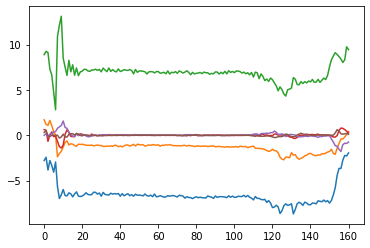

In [110]:
import matplotlib.pyplot as plt
plt.plot(data)

In [111]:
data = data.iloc[0 : 128, 0 : 6]

In [112]:
import numpy as np
from scipy.signal import butter, filtfilt

In [113]:
def butter_lowpass_filter(data, cutoff, fs, order):
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

In [114]:
T = 3.0  # Sample Preriod (sec)
fs = 50.0  # Sample rate (Hz)
cutoff = 20  # Cutoff Frequency (Hz) : slightly higher than actual 1.2Hz

nyq = 0.5 * fs  # Nyquist Frequency

order = 3
n = int(T * fs) 

In [115]:
data.shape

(128, 6)

In [116]:
AP_data = butter_lowpass_filter(data, cutoff, fs, order)

ValueError: ignored

In [ ]:
test_data = np.expand_dims(data,2)

In [ ]:
test_data.shape

In [ ]:
test_data = np.expand_dims(test_data,0)

In [ ]:
test_data.shape

In [ ]:
plt.plot(test_data)

In [ ]:
score = model.predict(test_data)

In [ ]:
score

In [ ]:
if score > 0.5:
    print("비정상")

else:
    print(" 정상 ")